#### to check performance of mediapipe onto a single image

In [39]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

In [40]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

custom_style = mp_drawing_styles.get_default_pose_landmarks_style()
custom_connections = list(mp_pose.POSE_CONNECTIONS)

In [41]:
# Load your image
image_path = '/Users/rushirajgadhvi/Desktop/mlpr/project/data/downdog/55.jpg'
image = cv2.imread(image_path)

# Convert the image to RGB (MediaPipe requires RGB input)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

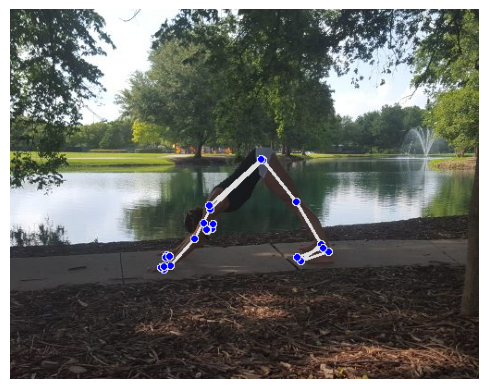

In [45]:
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [43]:
def detect(img):

    data = []
    # Create a Pose object
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        # Process the image to detect body pose
        results = pose.process(img)

        if results.pose_landmarks:
            # Draw the landmarks on the image
            mp_drawing.draw_landmarks(
                img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
            # Save the landmarks in a DataFrame
            for landmark in results.pose_landmarks.landmark:
                data += [landmark.x, landmark.y, landmark.z, landmark.visibility]

    return img, data

yes


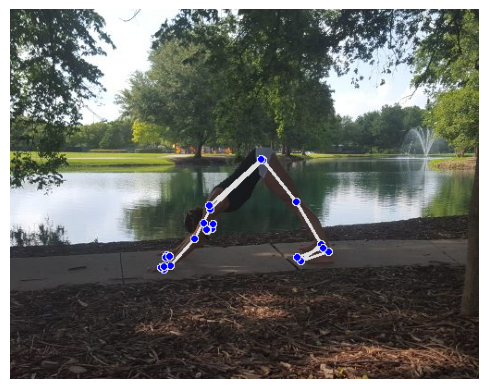

In [44]:
img, data = detect(image_rgb)
plt.imshow(img)
plt.axis('off')
plt.show()